<a href="https://colab.research.google.com/github/ChenHieu170600/ML-implementation/blob/main/Blue_Archive_AI_Image_Generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Nhấn nút hình tròn có tam giác ở trong để chạy AI, Khi nó ra đường link có dạng https://xxxx.gradio.live/ (mất khoảng 5-10p) thì vào link đó để sử dụng
import os
from google.colab.output import eval_js
os.environ['colab_url'] = eval_js("google.colab.kernel.proxyPort(7860, {'cache': false})")

!apt -y update -qq
!wget http://launchpadlibrarian.net/367274644/libgoogle-perftools-dev_2.5-2.2ubuntu3_amd64.deb
!wget https://launchpad.net/ubuntu/+source/google-perftools/2.5-2.2ubuntu3/+build/14795286/+files/google-perftools_2.5-2.2ubuntu3_all.deb
!wget https://launchpad.net/ubuntu/+source/google-perftools/2.5-2.2ubuntu3/+build/14795286/+files/libtcmalloc-minimal4_2.5-2.2ubuntu3_amd64.deb
!wget https://launchpad.net/ubuntu/+source/google-perftools/2.5-2.2ubuntu3/+build/14795286/+files/libgoogle-perftools4_2.5-2.2ubuntu3_amd64.deb
!apt install -qq libunwind8-dev
!dpkg -i *.deb
%env LD_PRELOAD=libtcmalloc.so
!rm *.deb

!apt -y install -qq aria2
!pip install -q --pre xformers
!pip install -q --pre triton

!git clone -b v2.0 https://github.com/camenduru/stable-diffusion-webui
!wget https://raw.githubusercontent.com/camenduru/stable-diffusion-webui-scripts/main/run_n_times.py -O /content/stable-diffusion-webui/scripts/run_n_times.py
!git clone https://github.com/deforum-art/deforum-for-automatic1111-webui /content/stable-diffusion-webui/extensions/deforum-for-automatic1111-webui
!git clone https://github.com/AlUlkesh/stable-diffusion-webui-images-browser /content/stable-diffusion-webui/extensions/stable-diffusion-webui-images-browser
!git clone https://github.com/camenduru/stable-diffusion-webui-huggingface /content/stable-diffusion-webui/extensions/stable-diffusion-webui-huggingface
!git clone -b v2.0 https://github.com/camenduru/sd-civitai-browser /content/stable-diffusion-webui/extensions/sd-civitai-browser
!git clone https://github.com/kohya-ss/sd-webui-additional-networks /content/stable-diffusion-webui/extensions/sd-webui-additional-networks
!git clone https://github.com/Mikubill/sd-webui-controlnet /content/stable-diffusion-webui/extensions/sd-webui-controlnet
!git clone https://github.com/camenduru/openpose-editor /content/stable-diffusion-webui/extensions/openpose-editor
!git clone https://github.com/jexom/sd-webui-depth-lib /content/stable-diffusion-webui/extensions/sd-webui-depth-lib
!git clone https://github.com/hnmr293/posex /content/stable-diffusion-webui/extensions/posex
!git clone https://github.com/camenduru/sd-webui-tunnels /content/stable-diffusion-webui/extensions/sd-webui-tunnels
%cd /content/stable-diffusion-webui
!git reset --hard

!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet/resolve/main/control_canny-fp16.safetensors -d /content/stable-diffusion-webui/extensions/sd-webui-controlnet/models -o control_canny-fp16.safetensors
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet/resolve/main/control_depth-fp16.safetensors -d /content/stable-diffusion-webui/extensions/sd-webui-controlnet/models -o control_depth-fp16.safetensors
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet/resolve/main/control_hed-fp16.safetensors -d /content/stable-diffusion-webui/extensions/sd-webui-controlnet/models -o control_hed-fp16.safetensors
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet/resolve/main/control_mlsd-fp16.safetensors -d /content/stable-diffusion-webui/extensions/sd-webui-controlnet/models -o control_mlsd-fp16.safetensors
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet/resolve/main/control_normal-fp16.safetensors -d /content/stable-diffusion-webui/extensions/sd-webui-controlnet/models -o control_normal-fp16.safetensors
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet/resolve/main/control_openpose-fp16.safetensors -d /content/stable-diffusion-webui/extensions/sd-webui-controlnet/models -o control_openpose-fp16.safetensors
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet/resolve/main/control_scribble-fp16.safetensors -d /content/stable-diffusion-webui/extensions/sd-webui-controlnet/models -o control_scribble-fp16.safetensors
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet/resolve/main/control_seg-fp16.safetensors -d /content/stable-diffusion-webui/extensions/sd-webui-controlnet/models -o control_seg-fp16.safetensors
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet/resolve/main/hand_pose_model.pth -d /content/stable-diffusion-webui/extensions/sd-webui-controlnet/annotator/openpose -o hand_pose_model.pth
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet/resolve/main/body_pose_model.pth -d /content/stable-diffusion-webui/extensions/sd-webui-controlnet/annotator/openpose -o body_pose_model.pth
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet/resolve/main/dpt_hybrid-midas-501f0c75.pt -d /content/stable-diffusion-webui/extensions/sd-webui-controlnet/annotator/midas -o dpt_hybrid-midas-501f0c75.pt
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet/resolve/main/mlsd_large_512_fp32.pth -d /content/stable-diffusion-webui/extensions/sd-webui-controlnet/annotator/mlsd -o mlsd_large_512_fp32.pth
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet/resolve/main/mlsd_tiny_512_fp32.pth -d /content/stable-diffusion-webui/extensions/sd-webui-controlnet/annotator/mlsd -o mlsd_tiny_512_fp32.pth
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet/resolve/main/network-bsds500.pth -d /content/stable-diffusion-webui/extensions/sd-webui-controlnet/annotator/hed -o network-bsds500.pth
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet/resolve/main/upernet_global_small.pth -d /content/stable-diffusion-webui/extensions/sd-webui-controlnet/annotator/uniformer -o upernet_global_small.pth
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet/resolve/main/t2iadapter_style_sd14v1.pth -d /content/stable-diffusion-webui/extensions/sd-webui-controlnet/models -o t2iadapter_style_sd14v1.pth
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet/resolve/main/t2iadapter_sketch_sd14v1.pth -d /content/stable-diffusion-webui/extensions/sd-webui-controlnet/models -o t2iadapter_sketch_sd14v1.pth
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet/resolve/main/t2iadapter_seg_sd14v1.pth -d /content/stable-diffusion-webui/extensions/sd-webui-controlnet/models -o t2iadapter_seg_sd14v1.pth
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet/resolve/main/t2iadapter_openpose_sd14v1.pth -d /content/stable-diffusion-webui/extensions/sd-webui-controlnet/models -o t2iadapter_openpose_sd14v1.pth
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet/resolve/main/t2iadapter_keypose_sd14v1.pth -d /content/stable-diffusion-webui/extensions/sd-webui-controlnet/models -o t2iadapter_keypose_sd14v1.pth
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet/resolve/main/t2iadapter_depth_sd14v1.pth -d /content/stable-diffusion-webui/extensions/sd-webui-controlnet/models -o t2iadapter_depth_sd14v1.pth
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet/resolve/main/t2iadapter_color_sd14v1.pth -d /content/stable-diffusion-webui/extensions/sd-webui-controlnet/models -o t2iadapter_color_sd14v1.pth
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet/resolve/main/t2iadapter_canny_sd14v1.pth -d /content/stable-diffusion-webui/extensions/sd-webui-controlnet/models -o t2iadapter_canny_sd14v1.pth

!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/WarriorMama777/OrangeMixs/resolve/main/Models/AbyssOrangeMix2/AbyssOrangeMix2_hard.safetensors -d /content/stable-diffusion-webui/models/Stable-diffusion -o AbyssOrangeMix2_hard.safetensors
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/Defpoint/Defmix-v1.0/resolve/main/Defmix-Red.safetensors -d /content/stable-diffusion-webui/models/Stable-diffusion -o Defmix-Red.safetensors
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/naonovn/chilloutmix_NiPrunedFp32Fix/resolve/main/chilloutmix_NiPrunedFp32Fix.safetensors -d /content/stable-diffusion-webui/models/Stable-diffusion -o chilloutmix_NiPrunedFp32Fix.safetensors
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/WarriorMama777/OrangeMixs/resolve/main/VAEs/orangemix.vae.pt -d /content/stable-diffusion-webui/models/Stable-diffusion -o orangemix.vae.pt
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/bboyjeans01/test/resolve/main/BA_Lora2.zip -d /content/stable-diffusion-webui/models/Lora -o BA_Lora2.zip
!unzip /content/stable-diffusion-webui/models/Lora/BA_Lora2.zip -d /content/stable-diffusion-webui/models/Lora
import os
old_name = r"/content/stable-diffusion-webui/models/Stable-diffusion/AbyssOrangeMix2_hard.safetensors"
new_name = r"/content/stable-diffusion-webui/models/Stable-diffusion/Anime_Realistic.safetensors"
os.rename(old_name, new_name)
old_name = r"/content/stable-diffusion-webui/models/Stable-diffusion/Defmix-Red.safetensors"
new_name = r"/content/stable-diffusion-webui/models/Stable-diffusion/Anime.safetensors"
os.rename(old_name, new_name)
old_name = r"/content/stable-diffusion-webui/models/Stable-diffusion/chilloutmix_NiPrunedFp32Fix.safetensors"
new_name = r"/content/stable-diffusion-webui/models/Stable-diffusion/Realistic.safetensors"
os.rename(old_name, new_name)
old_name = r"/content/stable-diffusion-webui/models/Stable-diffusion/orangemix.vae.pt"
new_name = r"/content/stable-diffusion-webui/models/Stable-diffusion/anime.vae.pt"
os.rename(old_name, new_name)

!sed -i -e '''/    prepare_environment()/a\    os.system\(f\"""sed -i -e ''\"s/dict()))/dict())).cuda()/g\"'' /content/stable-diffusion-webui/repositories/stable-diffusion-stability-ai/ldm/util.py""")''' /content/stable-diffusion-webui/launch.py

!mkdir /content/stable-diffusion-webui/extensions/deforum-for-automatic1111-webui/models
!python launch.py --share --xformers --enable-insecure-extension-access --theme dark --gradio-queue --cloudflared --no-half-vae

# **Hướng dẫn sử dụng**

**`Sau khi chạy app ở trên và vào giao diện AI, đầu tiên cần cài đặt AI như sau: `**

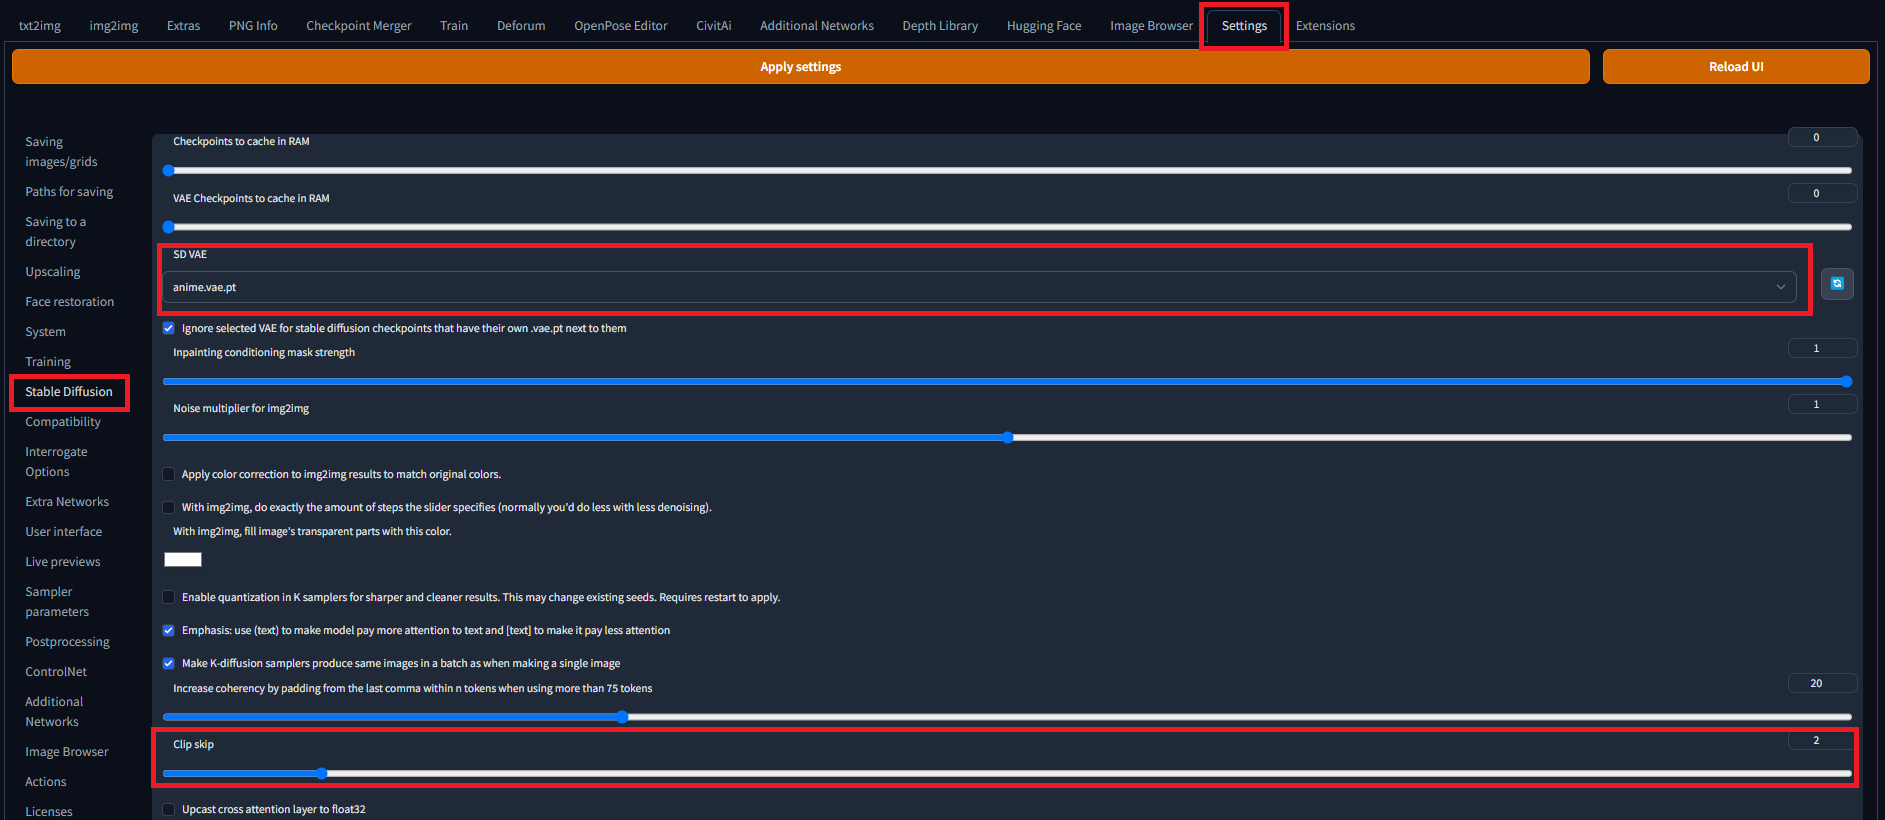

**`Hướng dẫn tạo ảnh: `**

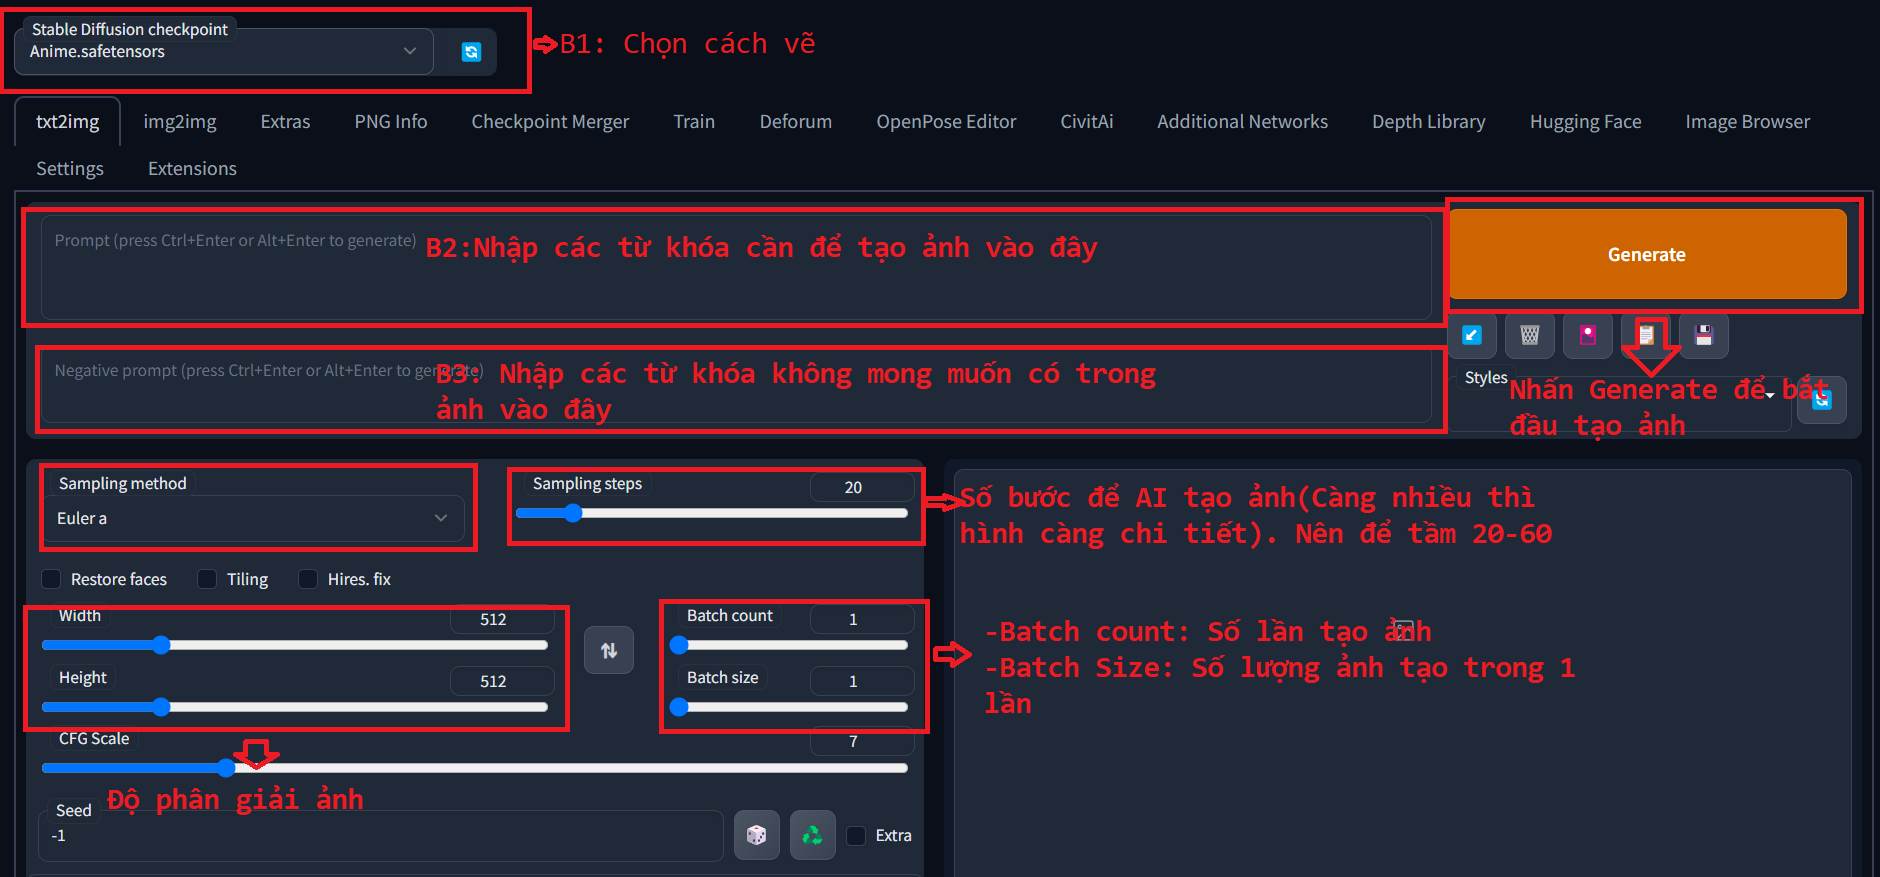

**Giải thích về Bước 1:**
Có 3 cách vẽ:

1.   Anime: Vẽ theo phong cách Anime
2.   Anime_Realistic: Vẽ theo phong cách Anime có 1 chút giống người thật(Lưu ý có thể vẽ NSFW), Khuyên dùng cái này vì nó đẹp :D
3.   Realistic: Vẽ theo phong cách người thật(Lưu ý có thể vẽ NSFW)





**Giải thích về Bước 2:**






Từ khóa để tạo ảnh: Là các tag cần để tạo ảnh nhân vật 

1. Bắt buộc đầu tiên luôn có tag <<lora:name:1>>. với name là thay **tên nhân vật** blue archive vào(danh sách nhân vật có ở dưới) ví du <<lora:kazusa:1>>. 
2. Tiếp theo là các tag mô tả kỹ hơn mà bạn muốn về nhân vật, áo quần, phụ kiện,phong cảnh, tư thế nhân vật, góc quay camera...

Lưu ý: Các tag là các tag ở danbooru: https://danbooru.donmai.us/tags

*Ví dụ về bộ từ khóa để tạo nhân vật Kazusa:*


In [ ]:
<lora:kazusa:1>, kazusa, 1girl, animal ears, colored inner hair, halo,black choker, black jacket, black pantyhose, green sailor collar, hooded jacket, white skirt, miniskirt, pink neckerchief, school uniform, hairclip, collarbone, medium breasts, BREAK selfie, blush, (sweatdrop:1.05), closed mouth, pursed lips, (wavy mouth:0.7), (v over eye, peace sign:1.1), (v-shaped eyebrows:1.2), sitting, day, tree, park, (reaching towards viewer:1.275), blue sky, looking at viewer

hoặc đơn giản hơn:

In [ ]:
<lora:kazusa:1>, masterpiece, best quality, 1girl, kazusa

**Giải thích về Bước 3:**


Tương tự như Bước 2 nhưng là các luôn tag không muốn xuất hiện trong ảnh.
Có thể dùng tất cả các tag sau đây:



```
(worst quality, low quality:1.4), (badpromptv2:0.8), missing fingers, blurry, depth of field, (multiple views), (monotone), 3D, (mutated, mutation, malformed:1.1), (poorly drawn:1.2), abnormal, bad face, bad body, bad anatomy, (bad eyes), bad hands, (bad), disfigured, error, lowres, terrible quality, worst quality, (((deformed))), disfigured, (extra_limb), (poorly drawn hands), fat, greyscale, monochrome, (fused parts:1.2), huge breasts, mature, BREAK open jacket, (mangled fingers:1.05), cloudy sky, scarf
```



**Độ phân giải ảnh:** Tùy theo bạn cài đặt nhưng không nên để cao quá(cao quá cấu hình máy tính không tạo nổi ảnh sẽ bị crash). Độ phân giải thường dùng là 512x768

**Sampling method**: Có thể hiểu như là nét vẽ, cái này tùy bạn setting tới khi nào ưng mắt thì thôi. Khuyên dùng: DPM 2M ++ Karras

**Ví dụ về cài đặt để tạo ảnh sau khi hoàn thành các bước trên:**

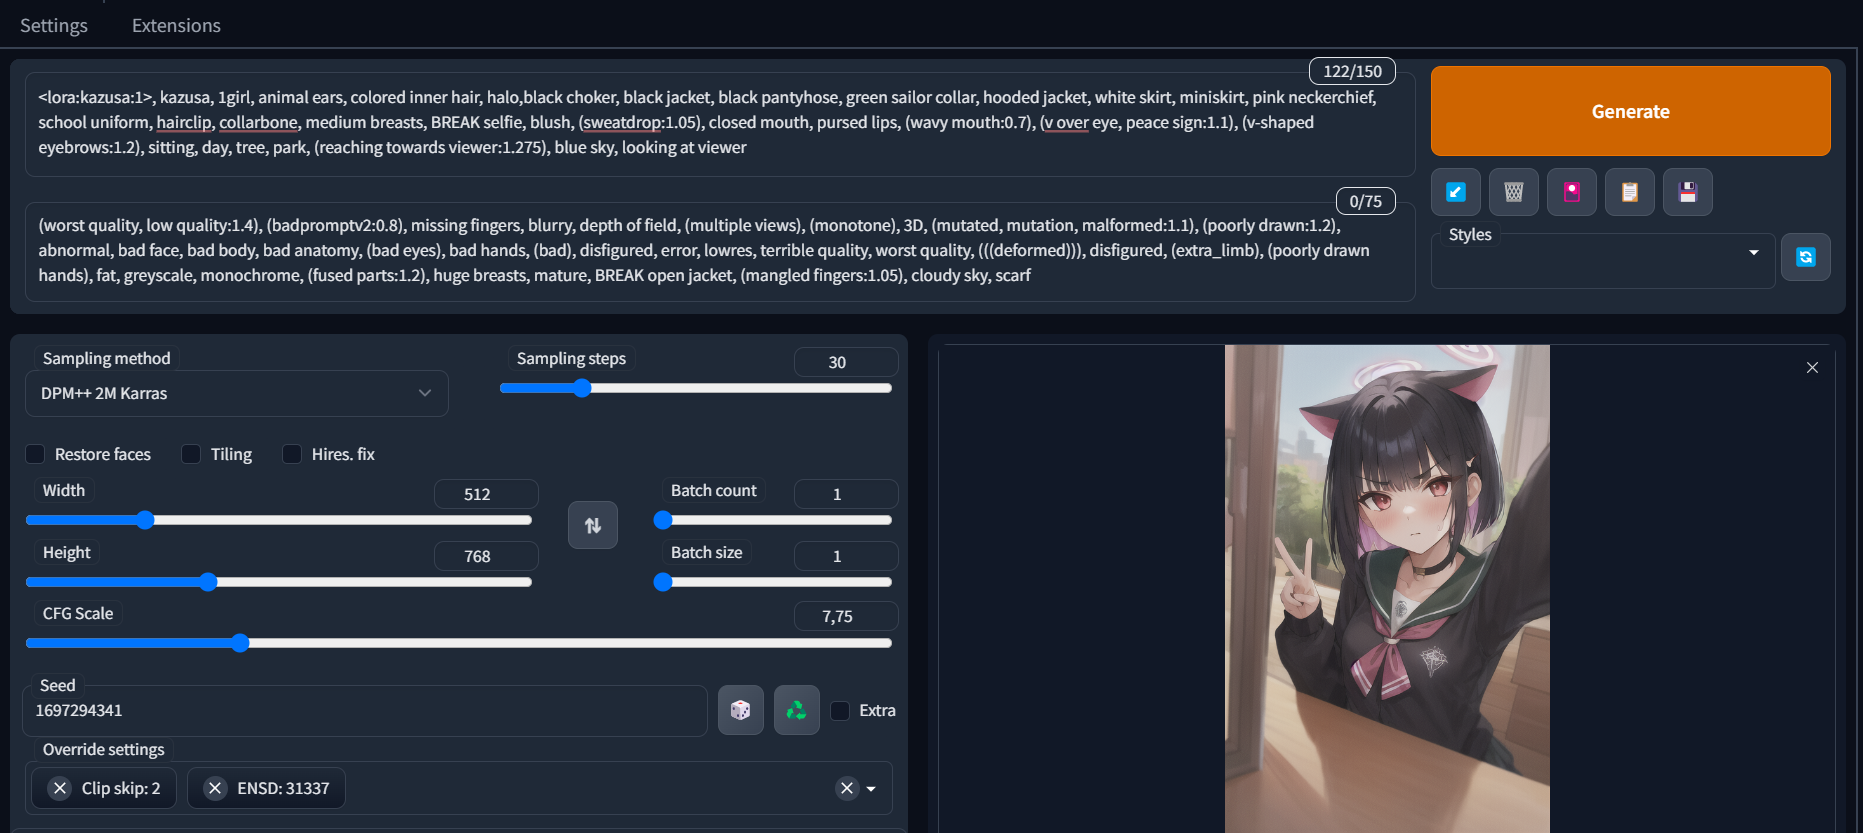

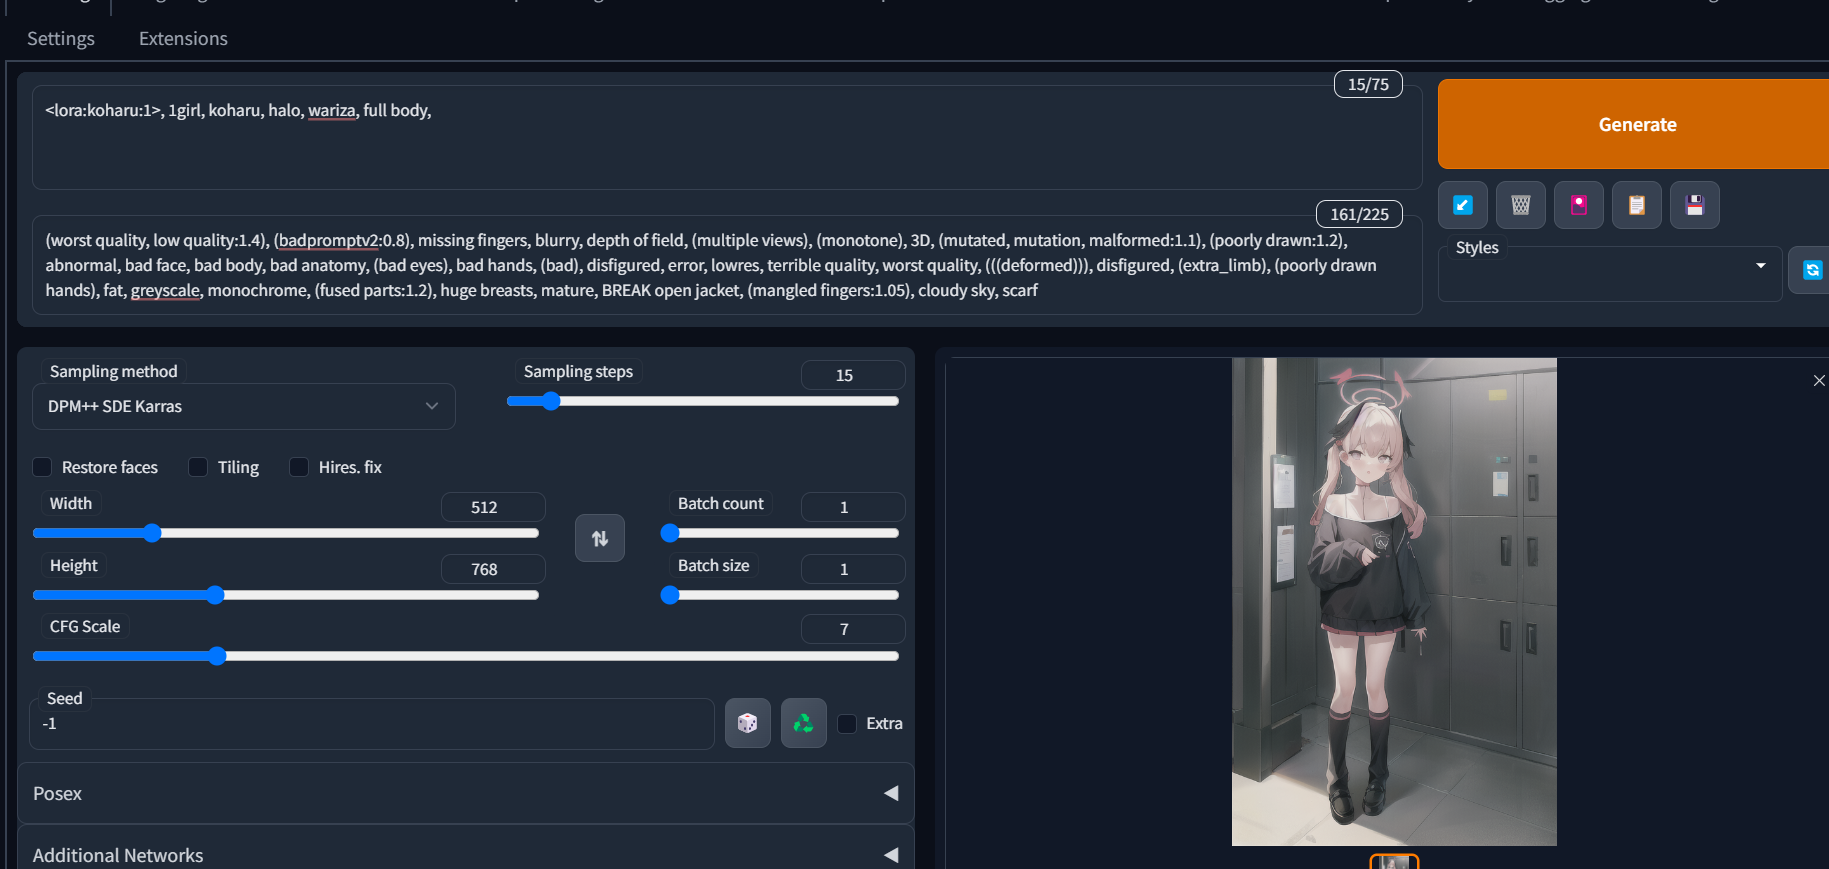

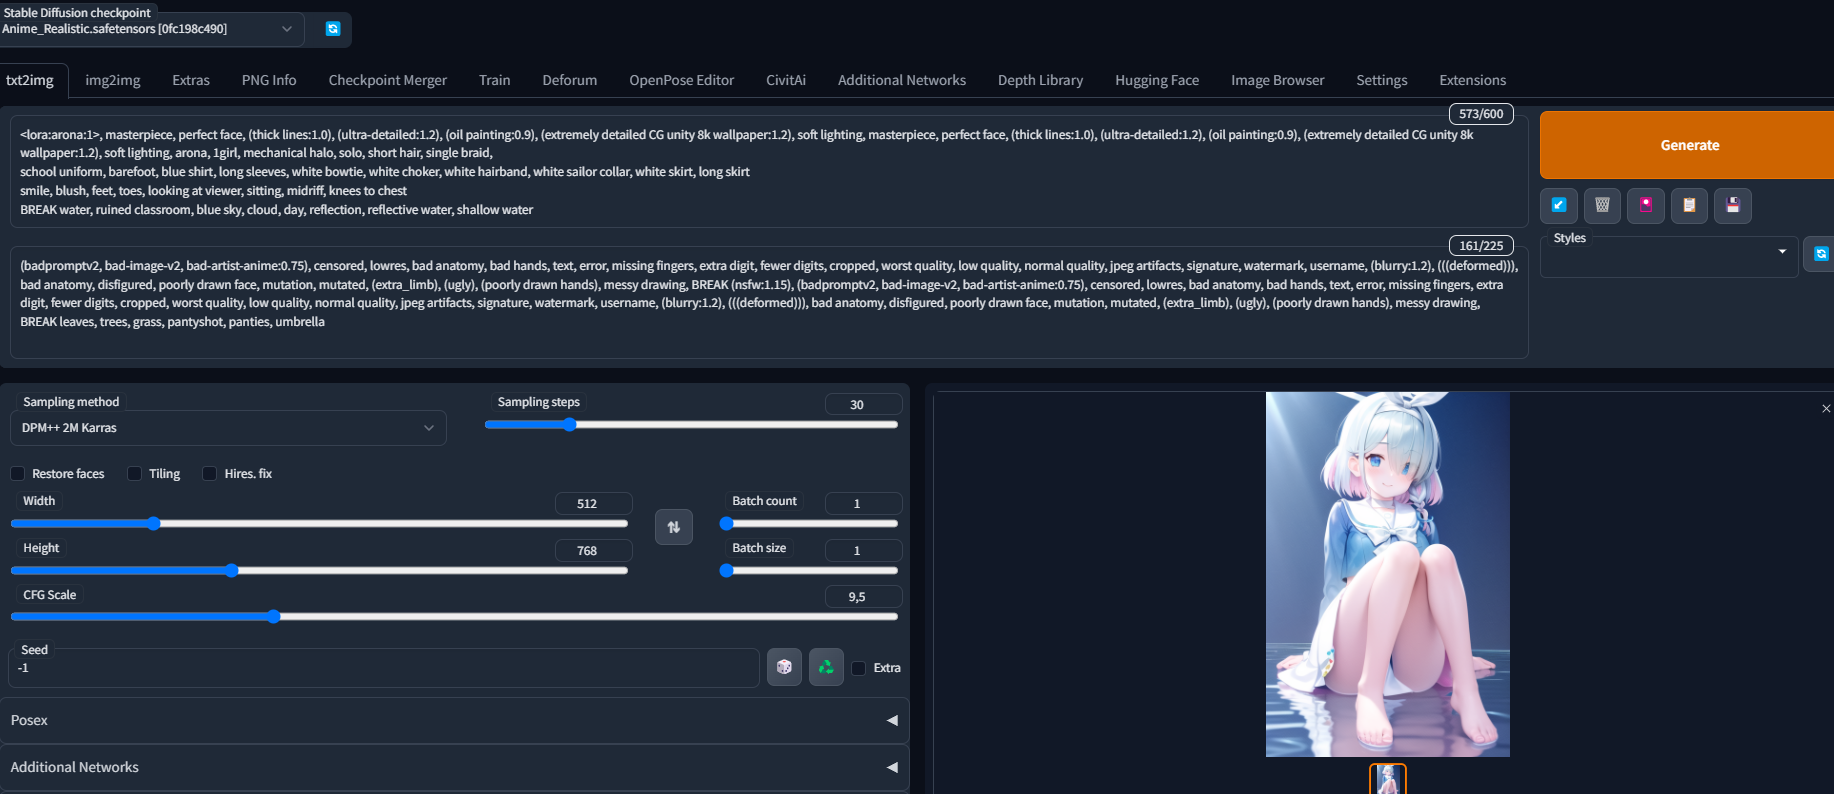

**Sửa lỗi khi bị treo hoặc bị lỗi không xác định:**

Ngắt kết nối phiên chạy và khởi động lại app

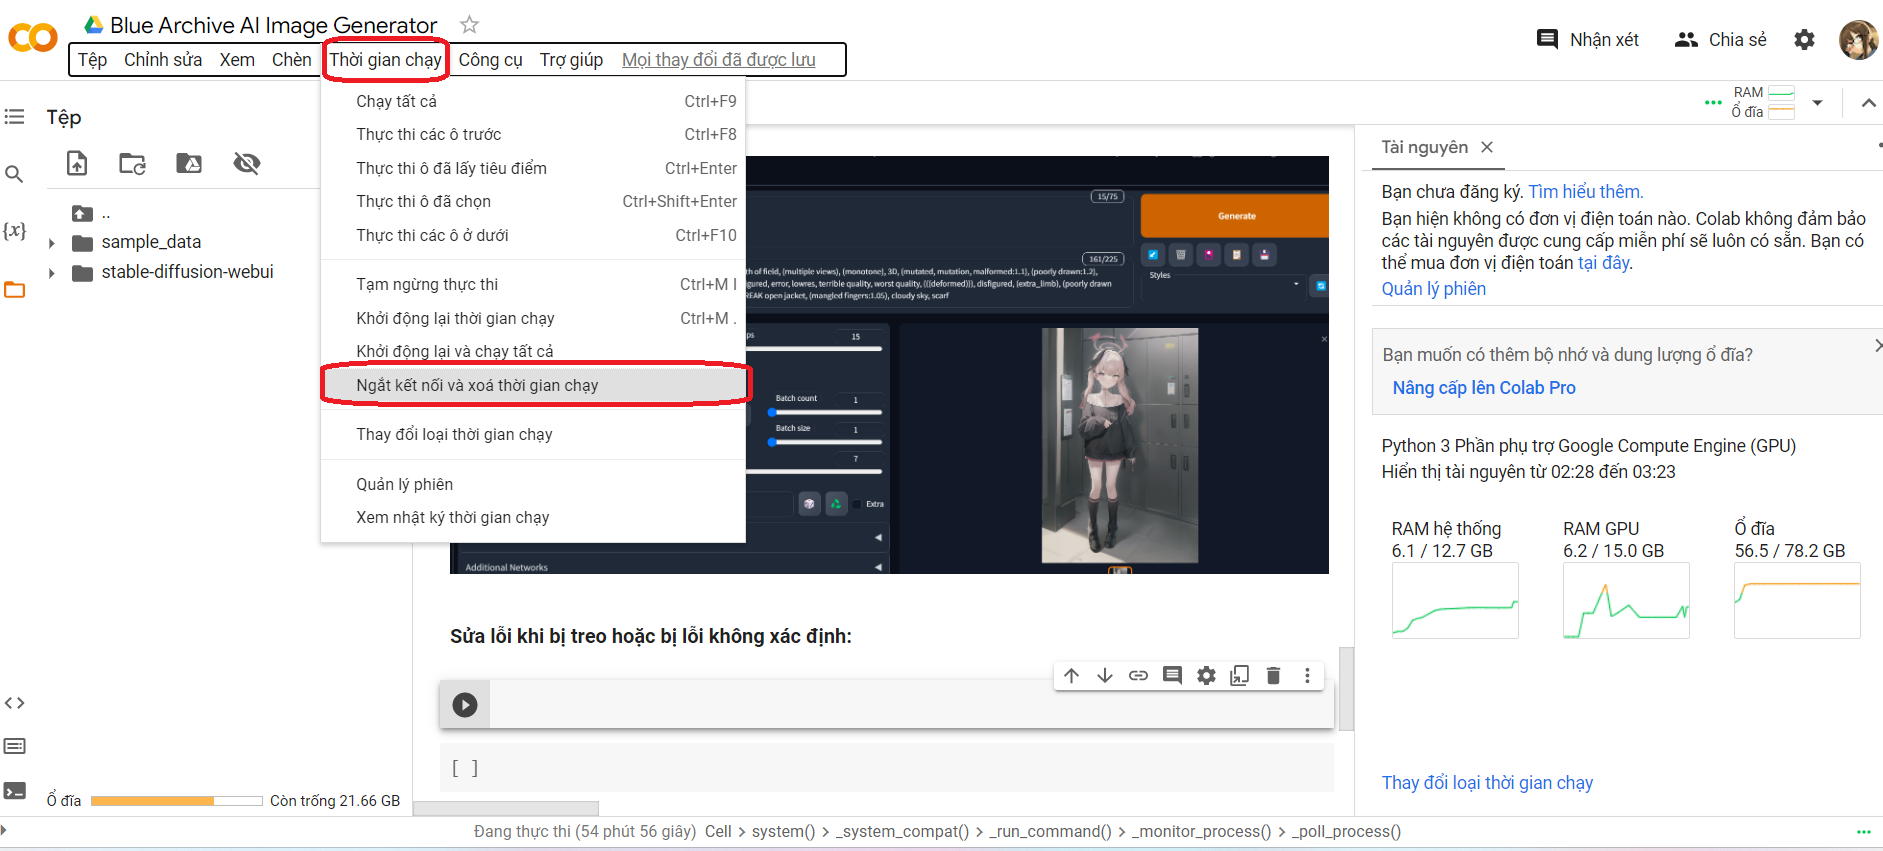

Nếu có thông báo "**Đã ngắt kết nối với phần phụ trợ GPU**" từ Google thì có nghĩa tài khoản google này đã đạt giới hạn tạo ảnh trong ngày. Đợi ngày tiếp theo hoặc đổi tài khoản Google khác để dùng tiếp.

**Danh sách tên nhân vật blue archive có thể tạo ảnh:**



```
ako,alice,arona,aru,blackarona,chise,fubuki,haruka,hasumi,hibiki,hifumi,hina,hiyori,iori,iroha,izuna,junko,kazusa,kisaki,kokona,mari,midori,miyu,momoka,mutsuki,noa,seia,serina,shiroko,shizuko,shizuko_bikini,shun,sora,toki,ui,yuuka
```

